**Ordinary Least Squares (OLS)** is a method used in linear regression to find the best-fitting line through a set of data points. The goal is to minimize the sum of the squared differences between the observed values (actual data points) and the values predicted by the line (predicted points).

Simple Example

Imagine you have a small dataset of heights and weights:

You want to predict a person's weight based on their height using a linear relationship:

Weight=m×Height+bWeight=m×Height+b

Where:

    mm is the slope of the line
    bb is the y-int

Goal: Find the values of m and b that minimize the difference between the actual weights and the predicted weights.

How OLS Works

    Plot the data: First, you plot the heights (x-axis) against the weights (y-axis).

    Initial line: Imagine drawing a random line through the data points. This line will have an equation like Weight=0.5×Height+30Weight=0.5×Height+30.

    Calculate errors: For each data point, calculate the difference between the actual weight and the predicted weight from the line. This difference is called the "error" or "residual".

    Square the errors: To ensure all errors are positive (since some differences could be negative), square each error.

    Sum the squared errors: Add up all these squared errors. This sum is the "sum of squared errors" (SSE).

    Minimize the SSE: OLS finds the line(value of mm and bb) that minimizes this SSE. The line with the smallest SSE is considered the best fit for the data.ercept.

**Why OLS is Used**

OLS is widely used because:

    - Simplicity: It provides a straightforward, closed-form solution for linear regression.
    - Efficiency: In many cases, especially with small to moderately sized datasets, OLS is computationally efficient.
    - Interpretability: The results (slope mm and intercept bb) are easy to interpret.

### OLS vs. Gradient Descent

OLS and Gradient Descent are both used to find the best-fitting parameters for a model, but they differ in approach:
    
    Method:
        OLS: Directly computes the best parameters using a closed-form formula. It finds the exact solution by solving mathematical equations.
        Gradient Descent: Iteratively adjusts parameters to minimize the error. It starts with an initial guess and takes small steps (learning rate) to gradually reach the minimum error.

    Efficiency:
        OLS: Can be computationally expensive for very large datasets because it involves matrix operations. For small to moderate datasets, it's fast and efficient.
        Gradient Descent: Scales better with large datasets and complex models. It’s particularly useful when the closed-form solution (like OLS) is computationally infeasible.

    Exactness:
        OLS: Provides an exact solution.
        Gradient Descent: Provides an approximate solution that depends on the learning rate and number of iterations.

    Applicability:
        OLS: Mainly used for linear regression.
        Gradient Descent: Used for a wide range of models, including linear and non-linear models, neural networks, etc.

Intuitive Analogy

    OLS is like finding the shortest route on a map directly using a formula.
    Gradient Descent is like walking from your current location towards the shortest route, step by step, adjusting your direction as you get closer.

In summary, OLS is a precise and direct method used mainly for linear regression, while Gradient Descent is a more general method used across many types of models, especially when a direct solution is hard to compute.


In [1]:
import pandas as pd

# Load the Titanic dataset (train.csv)
df = pd.read_csv('titanic.csv')

# Preview the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# prepare the data
# Select features and the target variable
# We'll use 'Pclass' and 'Age' as independent variables for simplicity
df = df[['Pclass', 'Age', 'Survived']]

# Drop rows with missing values
df = df.dropna()

# Separate features (X) and target (y)
X = df[['Pclass', 'Age']].values
y = df['Survived'].values

In [10]:
# learning rate 
lr = 0.1

In [11]:
# custom ols function
import numpy as np
import matplotlib.pyplot as plt

def custom_ols(X, y, num_iterations=100, learning_rate= lr):
    """
    Custom implementation of Ordinary Least Squares (OLS) method using gradient descent.

    Parameters:
    X : numpy.ndarray
        Input feature matrix (independent variables).
    y : numpy.ndarray
        Output target vector (dependent variable).
    num_iterations : int
        Number of iterations for gradient descent.
    learning_rate : float
        Learning rate for gradient descent.

    Returns:
    numpy.ndarray
        Coefficients for the linear regression model.
    """

    # Add a column of ones to X for the intercept term (bias)
    X = np.c_[np.ones(X.shape[0]), X]

    # Initialize coefficients (weights) with zeros
    coefficients = np.zeros(X.shape[1])

    # Store the history of coefficients, predictions, and errors for plotting
    coef_history = []
    pred_history = []
    error_history = []

    # Gradient Descent
    for _ in range(num_iterations):
        # Calculate predictions using the current coefficients
        predictions = X.dot(coefficients)

        # Calculate errors (difference between predictions and actual values)
        errors = predictions - y

        # Update coefficients using gradient descent formula
        # Gradient is proportional to X.T.dot(errors), learning rate controls step size
        gradient = X.T.dot(errors) / len(y)
        coefficients -= learning_rate * gradient

        # Store history for plotting
        coef_history.append(coefficients.copy())
        pred_history.append(predictions.copy())
        error_history.append(errors.copy())

    return coefficients, coef_history, pred_history, error_history

### Custom Plot Function to Visualize Predictions, Errors, and Slopes

This function will plot the predictions, errors, and slope values at each iteration.

In [12]:
def plot_ols_progress(X, y, coef_history, pred_history, error_history):
    """
    Plot the progress of the OLS method.

    Parameters:
    X : numpy.ndarray
        Input feature matrix (independent variables).
    y : numpy.ndarray
        Output target vector (dependent variable).
    coef_history : list of numpy.ndarray
        History of coefficients during the iterations.
    pred_history : list of numpy.ndarray
        History of predictions during the iterations.
    error_history : list of numpy.ndarray
        History of errors during the iterations.
    """
    
    X = np.c_[np.ones(X.shape[0]), X]  # Add the intercept term

    # Plotting
    plt.figure(figsize=(15, 5))

    # Subplot 1: Predictions
    plt.subplot(1, 3, 1)
    for i in range(len(pred_history)):
        plt.plot(X[:, 1], pred_history[i], alpha=0.1, color='blue')
    plt.scatter(X[:, 1], y, color='red', label='Actual')
    plt.title('Predictions')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()

    # Subplot 2: Errors
    plt.subplot(1, 3, 2)
    for i in range(len(error_history)):
        plt.plot(X[:, 1], error_history[i], alpha=0.1, color='orange')
    plt.title('Errors')
    plt.xlabel('Feature')
    plt.ylabel('Error')

    # Subplot 3: Slope Values (Coefficient for Feature)
    plt.subplot(1, 3, 3)
    slopes = [coef[1] for coef in coef_history]
    plt.plot(slopes, color='green')
    plt.title('Slope Values')
    plt.xlabel('Iteration')
    plt.ylabel('Slope')

    plt.tight_layout()
    plt.show()

In [13]:
# Apply the custom OLS function
coefficients, coef_history, pred_history, error_history = custom_ols(X, y)

Final Coefficients (Intercept, Pclass, Age): [-1.20908017e+200 -2.52412173e+200 -4.44327153e+201]


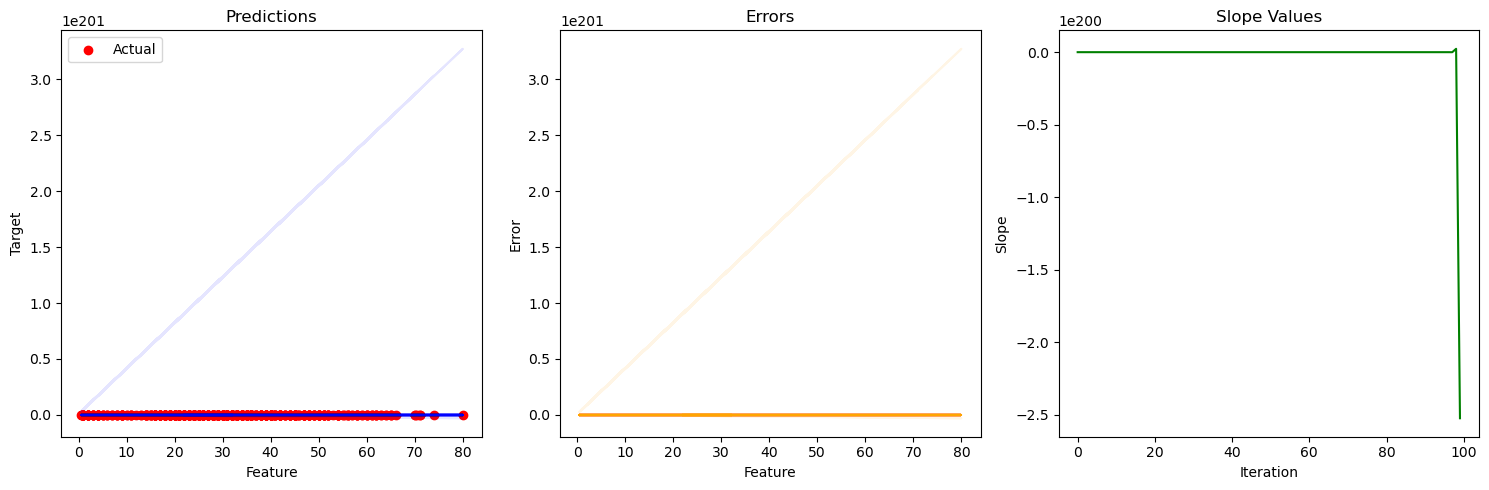

In [14]:
# Print the final coefficients
print("Final Coefficients (Intercept, Pclass, Age):", coefficients)

# Plot the OLS progress
plot_ols_progress(X[:, 1], y, coef_history, pred_history, error_history)

### Explanation

    Gradient Descent: The custom_ols function uses gradient descent to find the coefficients. It iteratively adjusts the coefficients to minimize the error between predictions and actual values.
    Learning Rate: Controls the step size of each iteration. A smaller learning rate means smaller steps, which might take longer to converge but will be more accurate.
    Iterations: The number of times the coefficients are updated. More iterations generally mean a better fit but take longer to compute.
    Plot Function: Visualizes how predictions, errors, and slope values (coefficients for features) evolve over iterations.

By running this code, you'll not only get the final coefficients but also gain insights into the process of finding those coefficients through the visual plots. This should help in understanding how the model is learning from the data.
